In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import train and test data
df_train = pd.read_csv('C:\Kaggle\HR_Anaytics/train_hr.csv')
df_test = pd.read_csv('C:\Kaggle\HR_Anaytics/test_hr.csv')

In [3]:
df_train.shape

(54808, 14)

In [4]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
Employee_id_train = df_train['employee_id']
Employee_id_test = df_test['employee_id']

df_train = df_train.iloc[:,1:]
df_test = df_test.iloc[:,1:]

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
department              23490 non-null object
region                  23490 non-null object
education               22456 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    21678 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


In [8]:
tr_rows = df_train.shape[0]
te_rows = df_test.shape[0]
y_train = df_train.is_promoted.values
data = pd.concat((df_train, df_test)).reset_index(drop=True)
data.drop(['is_promoted'], axis=1, inplace=True)
print(data.shape)

(78298, 12)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 12 columns):
KPIs_met >80%           78298 non-null int64
age                     78298 non-null int64
avg_training_score      78298 non-null int64
awards_won?             78298 non-null int64
department              78298 non-null object
education               74855 non-null object
gender                  78298 non-null object
length_of_service       78298 non-null int64
no_of_trainings         78298 non-null int64
previous_year_rating    72362 non-null float64
recruitment_channel     78298 non-null object
region                  78298 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 7.2+ MB


In [10]:
data['education'] = data['education'].fillna(data['education'].mode()[0])
data['previous_year_rating'] = data['previous_year_rating'].fillna(data['previous_year_rating'].mode()[0])

In [11]:
data['education'].replace("Master's & above",3,inplace=True)
data['education'].replace("Bachelor's",2,inplace=True)
data['education'].replace("Below Secondary",1,inplace=True)

In [12]:
data['sum_metric'] = data['awards_won?']+data['KPIs_met >80%'] + data['previous_year_rating']
data['tot_score'] = data['avg_training_score'] * data['no_of_trainings']

In [13]:
train = data[:tr_rows]
test = data[tr_rows:]

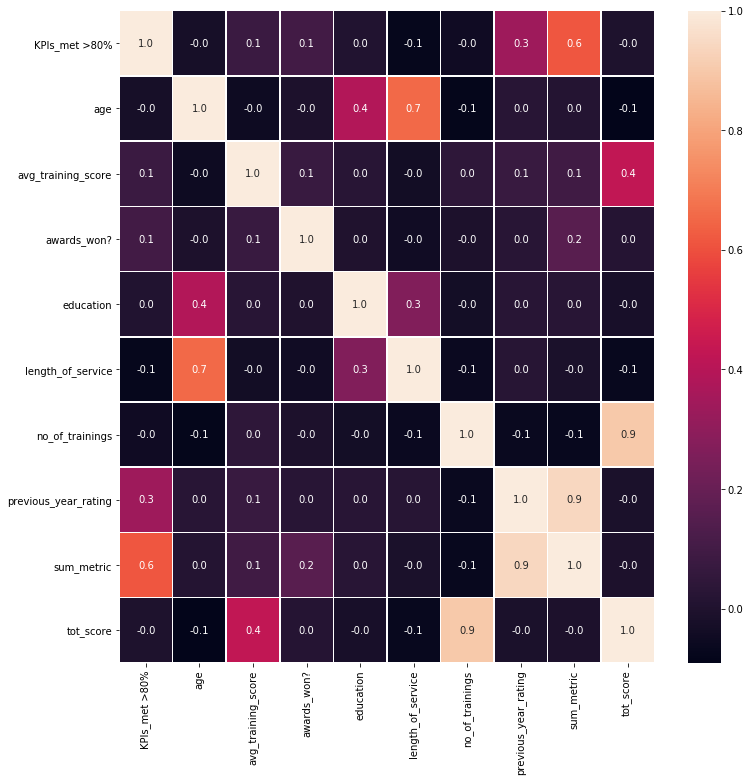

In [14]:
f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(train.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

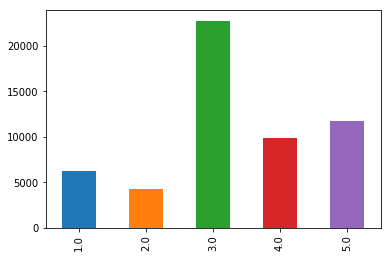

In [15]:
train['previous_year_rating'].value_counts().sort_index().head(50).plot.bar()

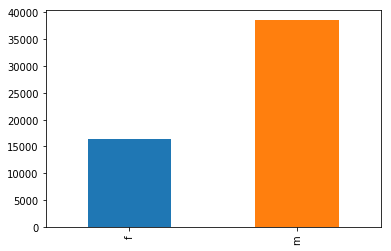

In [16]:
train['gender'].value_counts().sort_index().head(20).plot.bar()

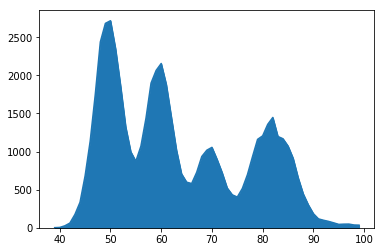

In [17]:
train['avg_training_score'].value_counts().sort_index().plot.area()

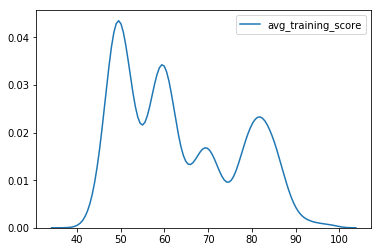

In [18]:
sns.kdeplot(train['avg_training_score'])

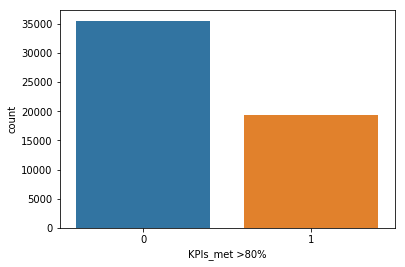

In [19]:
sns.countplot(train['KPIs_met >80%'])

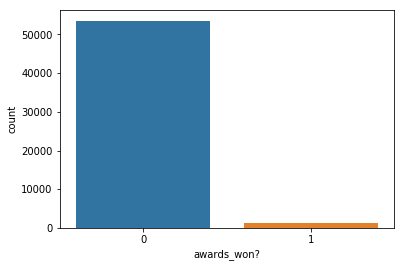

In [20]:
sns.countplot(train['awards_won?'])

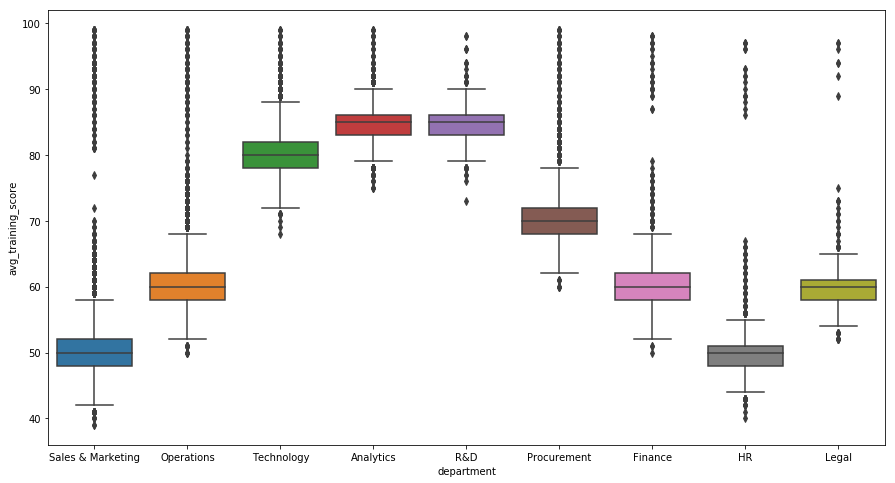

In [21]:
df= train[train.department.isin(train.department.value_counts().head(10).index)]
plt.figure(figsize=(15,8))
sns.boxplot(x='department',y='avg_training_score',data=df)

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train['department'] = le.fit_transform(train['department'])
test['department'] = le.transform(test['department'])

In [23]:
train['region'] = le.fit_transform(train['region'])
test['region'] = le.transform(test['region'])

train['education'] = le.fit_transform(train['education'])
test['education'] = le.transform(test['education'])

train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.transform(test['gender'])

train['recruitment_channel'] = le.fit_transform(train['recruitment_channel'])
test['recruitment_channel'] = le.transform(test['recruitment_channel'])

In [24]:
train.head()

,KPIs_met >80%,age,avg_training_score,awards_won?,department,education,gender,length_of_service,no_of_trainings,previous_year_rating,recruitment_channel,region,sum_metric,tot_score
0,1,35,49,0,7,2,0,8,1,5.0,2,31,6.0,49
1,0,30,60,0,4,1,1,4,1,5.0,0,14,5.0,60
2,0,34,50,0,7,1,1,7,1,3.0,2,10,3.0,50
3,0,39,50,0,7,1,1,10,2,1.0,0,15,1.0,100
4,0,45,73,0,8,1,1,2,1,3.0,0,18,3.0,73


In [25]:
train1=train.drop(['recruitment_channel'],axis=1)
train1=train1.values
Y=y_train

test1 = test.drop(['recruitment_channel'],axis=1)
test1=test1.values

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
scaler = StandardScaler()
scaler.fit(train1)
# Apply transform to both the training set and the test set.
train2 = scaler.transform(train1)
test2 = scaler.transform(test1)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [28]:
X_train, X_train_test, Y_train, Y_train_test = train_test_split(train2,y_train,test_size=0.2, random_state=123)

In [29]:
regr = LogisticRegression()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_train_test)
acc_log = round(regr.score(X_train_test, Y_train_test) * 100, 2)
acc_log

92.08

In [30]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_train_test)
acc_knn = round(knn.score(X_train_test, Y_train_test) * 100, 2)
acc_knn

91.76

In [31]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_train_test)
acc_gaussian = round(gaussian.score(X_train_test, Y_train_test) * 100, 2)
acc_gaussian

90.38

In [32]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_train_test)
acc_decision_tree = round(decision_tree.score(X_train_test, Y_train_test) * 100, 2)
acc_decision_tree

89.61

In [33]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_train_test)
acc_random_forest = round(random_forest.score(X_train_test, Y_train_test) * 100, 2)
acc_random_forest

93.58

In [34]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, Y_train)
acc_xgb_classifier = round(xgb_classifier.score(X_train_test, Y_train_test) * 100, 2)
acc_xgb_classifier

C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


93.83

In [35]:
import lightgbm as lgb
lgb_classifier = lgb.LGBMClassifier()
lgb_classifier.fit(X_train, Y_train)
acc_lgb_classifier = round(lgb_classifier.score(X_train_test, Y_train_test) * 100, 2)
acc_lgb_classifier

C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


94.49

In [36]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',   
               'Decision Tree', 'XGBoost','lgb'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree, acc_xgb_classifier,acc_lgb_classifier]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,lgb,94.49
5,XGBoost,93.83
2,Random Forest,93.58
1,Logistic Regression,92.08
0,KNN,91.76
3,Naive Bayes,90.38
4,Decision Tree,89.61


In [37]:
Y_pred = lgb_classifier.predict(test2)
subm = pd.DataFrame({
        "employee_id": Employee_id_test,
        "is_promoted": Y_pred
    })
subm.to_csv('HR_Analytics_1.csv', index=False)

C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
